In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    '머리가',
    '다리가',
    '눈이',
    '아픕니다.',
    '기침이 납니다.',
    '어지럼증이 있습니다.',
    '열이 납니다.',
    '허리가',
    '부어오릅니다.'
]

data = np.concatenate([
    np.load('dataset/seq_머리가_1698497130.npy'),
    np.load('dataset/seq_다리가_1698497130.npy'),
    np.load('dataset/seq_눈이_1698497130.npy'),
    np.load('dataset/seq_아픕니다._1698497130.npy'),
    np.load('dataset/seq_기침이 납니다._1698497130.npy'),
    np.load('dataset/seq_어지럼증이 있습니다._1698497130.npy'),
    np.load('dataset/seq_열이 납니다._1698497130.npy'),
    np.load('dataset/seq_허리가_1698497130.npy'),
    np.load('dataset/seq_부어오릅니다._1698497130.npy'),
], axis=0)

data.shape

(13251, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(13251, 30, 99)
(13251,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(13251, 9)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(11925, 30, 99) (11925, 9)
(1326, 30, 99) (1326, 9)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 44,361
Trainable params: 44,361
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model4.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
371/373 [============================>.] - ETA: 0s - loss: 63.9113 - acc: 0.2120
Epoch 1: val_acc improved from -inf to 0.26621, saving model to models\model4.h5
373/373 [==============================] - 6s 12ms/step - loss: 63.7801 - acc: 0.2121 - val_loss: 30.5837 - val_acc: 0.2662 - lr: 0.0010
Epoch 2/100
372/373 [============================>.] - ETA: 0s - loss: 22.2633 - acc: 0.2104
Epoch 2: val_acc did not improve from 0.26621
373/373 [==============================] - 4s 11ms/step - loss: 22.3020 - acc: 0.2102 - val_loss: 32.5666 - val_acc: 0.1290 - lr: 0.0010
Epoch 3/100
370/373 [============================>.] - ETA: 0s - loss: 48.9756 - acc: 0.2244
Epoch 3: val_acc improved from 0.26621 to 0.29035, saving model to models\model4.h5
373/373 [==============================] - 4s 12ms/step - loss: 48.7251 - acc: 0.2240 - val_loss: 12.9700 - val_acc: 0.2903 - lr: 0.0010
Epoch 4/100
370/373 [============================>.] - ETA: 0s - loss: 4.5696 - acc: 0.2747
Epoch 4

Epoch 29/100
371/373 [============================>.] - ETA: 0s - loss: 0.8567 - acc: 0.7288
Epoch 29: val_acc did not improve from 0.75943
373/373 [==============================] - 4s 11ms/step - loss: 0.8569 - acc: 0.7287 - val_loss: 0.9304 - val_acc: 0.6817 - lr: 0.0010
Epoch 30/100
370/373 [============================>.] - ETA: 0s - loss: 0.7874 - acc: 0.7572
Epoch 30: val_acc improved from 0.75943 to 0.81674, saving model to models\model4.h5
373/373 [==============================] - 4s 12ms/step - loss: 0.7859 - acc: 0.7581 - val_loss: 0.6995 - val_acc: 0.8167 - lr: 0.0010
Epoch 31/100
370/373 [============================>.] - ETA: 0s - loss: 0.7719 - acc: 0.7676
Epoch 31: val_acc did not improve from 0.81674
373/373 [==============================] - 4s 11ms/step - loss: 0.7706 - acc: 0.7679 - val_loss: 0.7751 - val_acc: 0.7624 - lr: 0.0010
Epoch 32/100
371/373 [============================>.] - ETA: 0s - loss: 0.7682 - acc: 0.7611
Epoch 32: val_acc did not improve from 0.816

373/373 [==============================] - 4s 11ms/step - loss: 0.3191 - acc: 0.9035 - val_loss: 0.2496 - val_acc: 0.9276 - lr: 0.0010
Epoch 58/100
372/373 [============================>.] - ETA: 0s - loss: 0.2803 - acc: 0.9136
Epoch 58: val_acc did not improve from 0.92760
373/373 [==============================] - 4s 11ms/step - loss: 0.2801 - acc: 0.9136 - val_loss: 0.2342 - val_acc: 0.9186 - lr: 0.0010
Epoch 59/100
372/373 [============================>.] - ETA: 0s - loss: 0.2537 - acc: 0.9213
Epoch 59: val_acc did not improve from 0.92760
373/373 [==============================] - 4s 12ms/step - loss: 0.2535 - acc: 0.9214 - val_loss: 0.3293 - val_acc: 0.9050 - lr: 0.0010
Epoch 60/100
370/373 [============================>.] - ETA: 0s - loss: 0.2701 - acc: 0.9234
Epoch 60: val_acc did not improve from 0.92760
373/373 [==============================] - 4s 12ms/step - loss: 0.2710 - acc: 0.9234 - val_loss: 0.3096 - val_acc: 0.9238 - lr: 0.0010
Epoch 61/100
371/373 [==================

Epoch 86/100
373/373 [==============================] - ETA: 0s - loss: 0.0367 - acc: 0.9890
Epoch 86: val_acc did not improve from 0.99548
373/373 [==============================] - 4s 11ms/step - loss: 0.0367 - acc: 0.9890 - val_loss: 0.0134 - val_acc: 0.9955 - lr: 0.0010
Epoch 87/100
370/373 [============================>.] - ETA: 0s - loss: 0.0212 - acc: 0.9951
Epoch 87: val_acc improved from 0.99548 to 0.99698, saving model to models\model4.h5
373/373 [==============================] - 4s 11ms/step - loss: 0.0211 - acc: 0.9951 - val_loss: 0.0094 - val_acc: 0.9970 - lr: 0.0010
Epoch 88/100
371/373 [============================>.] - ETA: 0s - loss: 0.0192 - acc: 0.9947
Epoch 88: val_acc did not improve from 0.99698
373/373 [==============================] - 4s 11ms/step - loss: 0.0198 - acc: 0.9944 - val_loss: 0.0485 - val_acc: 0.9827 - lr: 0.0010
Epoch 89/100
371/373 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9937
Epoch 89: val_acc did not improve from 0.996

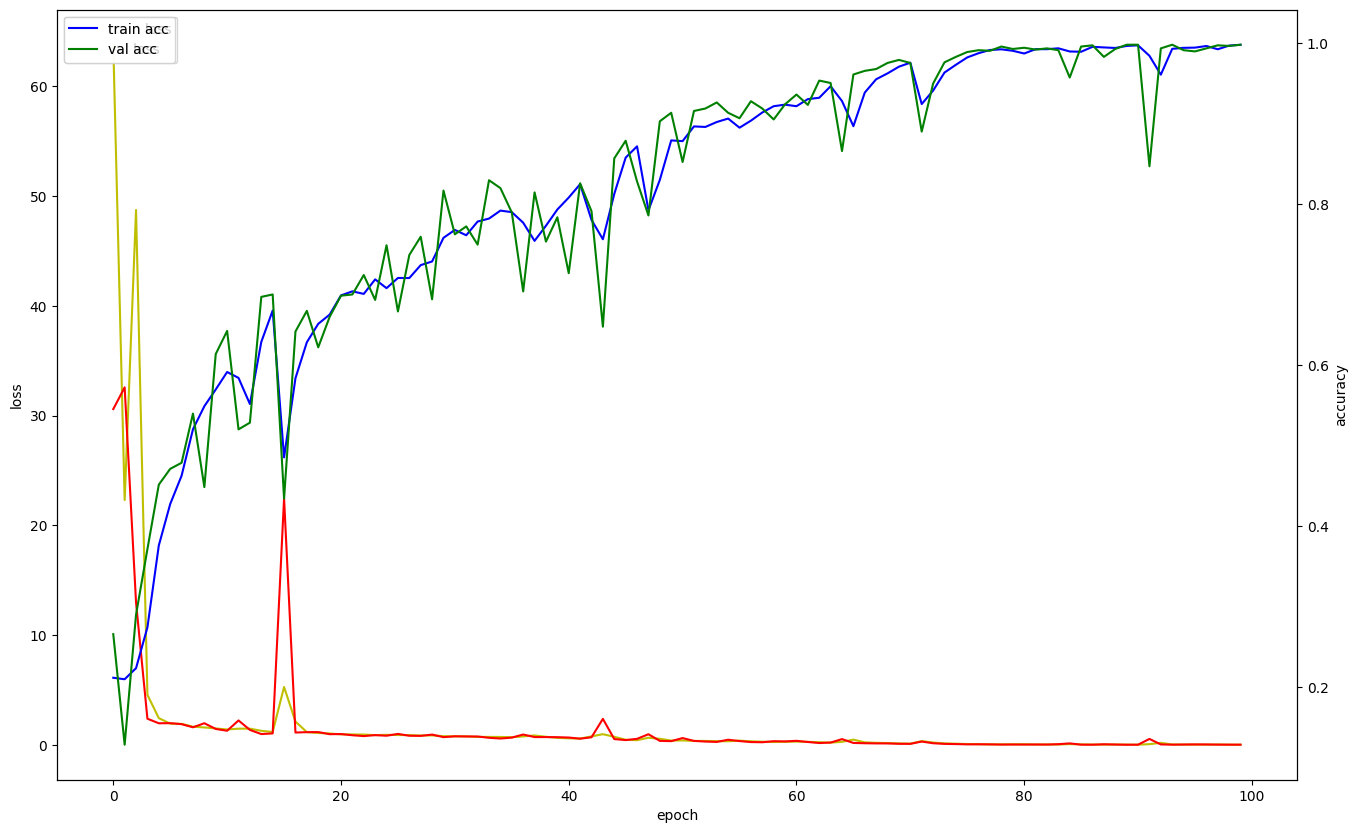

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model4.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

42/42 [==============================] - 0s 5ms/step


array([[[1233,    0],
        [   0,   93]],

       [[1112,    0],
        [   0,  214]],

       [[1252,    0],
        [   0,   74]],

       [[1232,    0],
        [   1,   93]],

       [[1230,    0],
        [   0,   96]],

       [[1239,    1],
        [   1,   85]],

       [[1102,    0],
        [   1,  223]],

       [[1078,    1],
        [   0,  247]],

       [[1127,    1],
        [   0,  198]]], dtype=int64)